## General set-up

In [2]:
import random
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *

In [3]:
pd.set_option('mode.chained_assignment', None)

In [4]:
p = 0.01

df = pd.read_csv(
    'MICRODADOS_ENEM_2019.csv',
    header=0,
    encoding = "ISO-8859-1",
    skiprows=lambda i: i > 0 and random.random() > p,
    sep=';'
)

df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004725,2019,1505536,Parauapebas,15,PA,20,F,1,3,1,1505536.0,Parauapebas,15.0,PA,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1505536,Parauapebas,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,A,3,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A
1,190001004743,2019,1501402,Belém,15,PA,21,M,1,3,1,1501402.0,Belém,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1501402,Belém,15,PA,1,1,1,1,504.0,507.0,511.0,516.0,464.0,524.5,442.3,608.2,BCBDAECBEDBEADEACDDDAACEDEBCABCBEADBAAACEDBCD,BEDAABACCADCECEDEACCEABDCDBCAECCDADDBCADEBBCE,BBDCA99999CBADEECDECDECBCADCBCEADCCDAECABADABD...,CADEBDAACCCBABDADDBCBEDCACDBAACACEBEEBADEEBDC,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,180.0,140.0,140.0,100.0,720.0,H,E,F,B,3,D,A,B,C,A,A,B,A,A,A,B,A,A,C,A,B,C,A,B,B
2,190001004758,2019,1505536,Parauapebas,15,PA,18,F,1,3,1,1501402.0,Belém,15.0,PA,2,0,2,1.0,0,15125432.0,1505536.0,Parauapebas,15.0,PA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1505536,Parauapebas,15,PA,1,1,1,1,504.0,510.0,513.0,516.0,402.9,517.6,544.8,587.0,CBCCDDCBCAEBDCDAACAADEDEBDDBABCDAEEEACBECDBCD,AEACCEDBCCBAAECCEAEECABDBEDEABDCCBCEAEDDDBDCB,99999DEBCBABCCEDBAEECEDDEAACDAADAEDCDDAEDCECED...,DCAEBAAEDEECABCBBDECDEADEDEEABCBEDEDCEBECEDDC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,140.0,120.0,120.0,120.0,100.0,600.0,F,D,C,B,5,C,A,B,C,A,A,B,B,A,A,A,A,A,B,B,A,C,A,B,A
3,190001004859,2019,1500602,Altamira,15,PA,21,F,1,3,1,1500602.0,Altamira,15.0,PA,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0

## Data Wrangling

In [5]:
answers = ['TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT']
correct_answers = ['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT']
scores = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']
foreign_language = ['TP_LINGUA']
subset = df[foreign_language+answers+correct_answers+scores+['NU_NOTA_REDACAO']]

In [6]:
subset.head()

,TP_LINGUA,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,BCBDAECBEDBEADEACDDDAACEDEBCABCBEADBAAACEDBCD,BEDAABACCADCECEDEACCEABDCDBCAECCDADDBCADEBBCE,BBDCA99999CBADEECDECDECBCADCBCEADCCDAECABADABD...,CADEBDAACCCBABDADDBCBEDCACDBAACACEBEEBADEEBDC,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,464.0,524.5,442.3,608.2,720.0
2,1,CBCCDDCBCAEBDCDAACAADEDEBDDBABCDAEEEACBECDBCD,AEACCEDBCCBAAECCEAEECABDBEDEABDCCBCEAEDDDBDCB,99999DEBCBABCCEDBAEECEDDEAACDAADAEDCDDAEDCECED...,DCAEBAAEDEECABCBBDECDEADEDEEABCBEDEDCEBECEDDC,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,402.9,517.6,544.8,587.0,600.0
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,AECDCBADDCCDBDDCBBBCECADCDEDDEEBEDAADCBEACABC,CEACCCDBBBBDDCDABBDBBEABCABCDCDADACCDEECDBDDB,99999BEACBCBDABAECCEEDDABAABECCEDDDAEEDEBCCBCA...,EEBADECCBBEEBDECEEADDBBCAEDEBEEEEEDEACDACCECB,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,464.4,474.4,513.2,553.5,560.0


In [7]:
subset = subset.dropna()

In [8]:
subset['TX_RESPOSTAS_LC'] = subset['TX_RESPOSTAS_LC'].str.replace('9', '')

In [9]:
subset.loc[subset.TP_LINGUA == 0, 'TX_GABARITO_LC'] = subset.query('TP_LINGUA ==0')['TX_GABARITO_LC'].str.slice(stop=5)+subset['TX_GABARITO_LC'].str.slice(start=10)

In [10]:
subset.loc[subset.TP_LINGUA == 1, 'TX_GABARITO_LC'] = subset['TX_GABARITO_LC'].str.slice(start=5)

In [11]:
subset['ACERTOS_CN'] = subset.apply(lambda x: np.sum(np.array(list(x['TX_RESPOSTAS_CN'])) == np.array(list(x['TX_GABARITO_CN']))), axis=1)
subset['ACERTOS_CH'] = subset.apply(lambda x: np.sum(np.array(list(x['TX_RESPOSTAS_CH'])) == np.array(list(x['TX_GABARITO_CH']))), axis=1)
subset['ACERTOS_LC'] = subset.apply(lambda x: np.sum(np.array(list(x['TX_RESPOSTAS_LC'])) == np.array(list(x['TX_GABARITO_LC']))), axis=1)
subset['ACERTOS_MT'] = subset.apply(lambda x: np.sum(np.array(list(x['TX_RESPOSTAS_MT'])) == np.array(list(x['TX_GABARITO_MT']))), axis=1)

In [12]:
subset['SOMA_NOTAS_OBJ'] = subset[scores].sum(axis=1)

In [13]:
subset = subset.drop(columns=foreign_language+answers+correct_answers)

In [14]:
subset.shape

(37138, 10)

In [15]:
hits = ['ACERTOS_CN', 'ACERTOS_CH', 'ACERTOS_LC', 'ACERTOS_MT']
subset = subset[scores + hits + ['SOMA_NOTAS_OBJ', 'NU_NOTA_REDACAO']]
subset.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,ACERTOS_CN,ACERTOS_CH,ACERTOS_LC,ACERTOS_MT,SOMA_NOTAS_OBJ,NU_NOTA_REDACAO
1,464.0,524.5,442.3,608.2,12,16,13,14,2039.0,720.0
2,402.9,517.6,544.8,587.0,10,15,20,13,2052.3,600.0
4,464.4,474.4,513.2,553.5,11,14,16,9,2005.5,560.0
5,521.2,558.0,557.0,567.3,17,19,24,13,2203.5,420.0
6,358.2,367.3,417.8,391.3,10,9,7,6,1534.6,440.0


## Machine Learning

In [21]:
caret_df = setup(data = subset, target = 'SOMA_NOTAS_OBJ', session_id=55, ignore_features=scores+['NU_NOTA_REDACAO'])

,Description,Value
0,session_id,55
1,Target,SOMA_NOTAS_OBJ
2,Original Data,"(37138, 10)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(25996, 4)"


In [22]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,49.5890,4064.4806,63.7487,0.9481,0.0336,0.0255,0.2500
gbr,Gradient Boosting Regressor,50.2657,4124.4292,64.2170,0.9473,0.0336,0.0257,0.1150
xgboost,Extreme Gradient Boosting,50.4157,4182.8035,64.6702,0.9466,0.0340,0.0259,0.9940
knn,K Neighbors Regressor,53.5776,4768.6082,69.0503,0.9391,0.0365,0.0275,0.0240
rf,Random Forest Regressor,54.5724,4990.3499,70.6379,0.9363,0.0372,0.0280,0.3590
en,Elastic Net,57.1692,5168.7052,71.8892,0.9340,0.0376,0.0289,0.0060
br,Bayesian Ridge,57.1327,5166.4316,71.8736,0.9340,0.0375,0.0289,0.0060
lar,Least Angle Regression,57.1327,5166.4320,71.8736,0.9340,0.0375,0.0289,0.0070
ridge,Ridge Regression,57.1327,5166.4318,71.8736,0.9340,0.0375,0.0289,0.0060
lasso,Lasso Regression,57.1368,5166.4740,71.8739,0.9340,0.0375,0.0289,0.2860


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=55, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [26]:
cat_reg = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,49.8394,4033.0650,63.5064,0.9478,0.0334,0.0256
1,49.1145,3958.8835,62.9197,0.9490,0.0327,0.0252
2,47.2034,3743.1354,61.1812,0.9540,0.0319,0.0242
3,47.8214,3847.0339,62.0245,0.9508,0.0332,0.0247
4,49.7403,4010.5954,63.3293,0.9470,0.0334,0.0256
5,48.3757,3776.2837,61.4515,0.9535,0.0320,0.0247
6,48.3902,3840.3239,61.9703,0.9510,0.0323,0.0247
7,49.4378,4034.1617,63.5151,0.9476,0.0334,0.0253
8,48.2026,3832.5436,61.9075,0.9533,0.0325,0.0248
9,49.6999,4053.5034,63.6671,0.9458,0.0339,0.0257


In [27]:
tuned_cat = tune_model(cat_reg)
print(tuned_cat)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,49.9988,4045.6286,63.6053,0.9476,0.0333,0.0257
1,49.5283,4000.2205,63.2473,0.9485,0.0328,0.0254
2,47.7465,3898.2069,62.4356,0.9521,0.0337,0.0247
3,48.3357,4050.0528,63.6400,0.9482,0.0349,0.0251
4,50.1167,4089.4675,63.9489,0.9460,0.0340,0.0258
5,48.7187,3843.2964,61.9943,0.9527,0.0323,0.0248
6,48.9767,3898.8098,62.4404,0.9503,0.0325,0.0250
7,49.7766,4101.3752,64.0420,0.9468,0.0338,0.0255
8,48.8505,3988.2394,63.1525,0.9514,0.0338,0.0252
9,49.7882,4014.6074,63.3609,0.9463,0.0334,0.0257


In [29]:
evaluate_model(tuned_cat)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

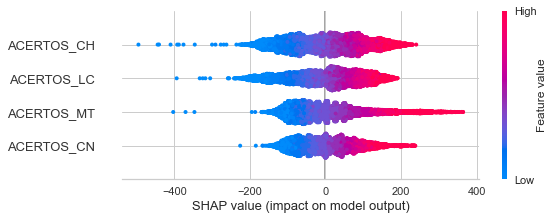

In [32]:
interpret_model(tuned_cat)

In [33]:
save_model(tuned_cat, 'enem_predictor')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['NU_NOTA_CN',
                                                        'NU_NOTA_CH',
                                                        'NU_NOTA_LC',
                                                        'NU_NOTA_MT',
                                                        'NU_NOTA_REDACAO'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='SOMA_NOTAS_OBJ',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_avail...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='SOMA_NOTAS_OBJ'))